In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import normalize
from sklearn.ensemble import GradientBoostingRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
train_df.shape

(1460, 81)

In [4]:
test_df.shape

(1459, 80)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [8]:
train_df.count(0) / train_df.shape[0] * 100

Id               100.000000
MSSubClass       100.000000
MSZoning         100.000000
LotFrontage       82.260274
LotArea          100.000000
                    ...    
MoSold           100.000000
YrSold           100.000000
SaleType         100.000000
SaleCondition    100.000000
SalePrice        100.000000
Length: 81, dtype: float64

There are some missing values, which we will need to handle accorndingly

Let's have list of columns based on datatyes object and numerical

In [9]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
cat_cols = list(train_df.select_dtypes(include='object'))
num_cols = list(train_df.select_dtypes(exclude='object'))

In [11]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

Let's check the values for categorical attributes

In [13]:
for col in cat_cols:
    print(col+" : ", train_df[col].unique(), len(train_df[col].unique()))

MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH'] 5
Street :  ['Pave' 'Grvl'] 2
Alley :  [nan 'Grvl' 'Pave'] 3
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3'] 4
LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS'] 4
Utilities :  ['AllPub' 'NoSeWa'] 2
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 5
LandSlope :  ['Gtl' 'Mod' 'Sev'] 3
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 25
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 9
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 8
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 5
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 8
RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 6
RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdShak

We have to deal with these categorical values and convert them to numbers based on the ordinal or nominal characterstic and also based on the general understanding of the attribute meaning and/or characterstic

Let's check correlation matrix before taking next steps

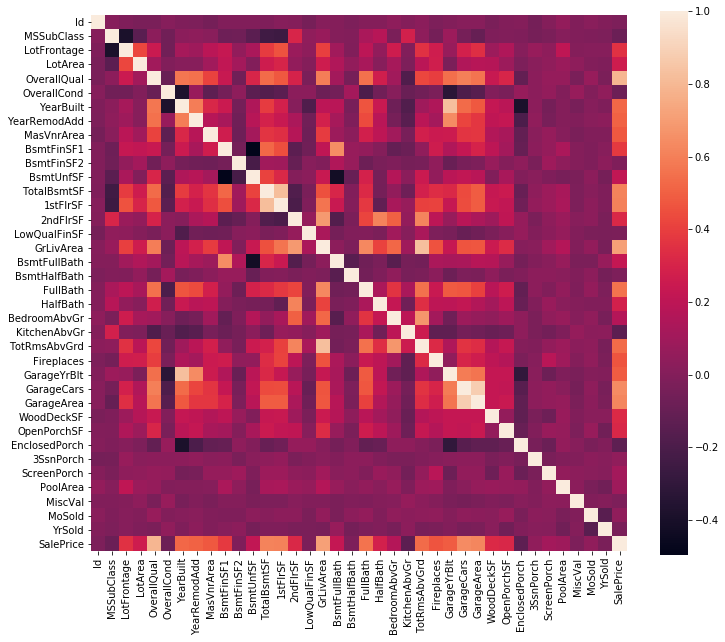

In [14]:
corr_matrix = train_df.corr()
plt.subplots(figsize = (12,10))
sns.heatmap(corr_matrix, vmax=1, square = True)

In [15]:
train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [16]:
# Let's derive the age property at the time of sale, YearSold-YearBuilt and drop these two attributes

train_df['age'] = train_df['YrSold'] - train_df['YearBuilt']
train_df.drop(['YrSold','YearBuilt'], axis = 1, inplace = True)

In [17]:
test_df['age'] = test_df['YrSold'] - test_df['YearBuilt']
test_df.drop(['YrSold', 'YearBuilt'], axis = 1, inplace = True )

In [18]:
# Let's drop the least correlated attributes with saleprice

train_df.drop(['MSSubClass','OverallCond','3SsnPorch','PoolArea','MiscVal','MoSold'], axis = 1, inplace = True)

In [19]:
test_df.drop(['MSSubClass','OverallCond','3SsnPorch','PoolArea','MiscVal','MoSold'], axis = 1, inplace = True)

In [20]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)

In [21]:
train_df.corr()

,Id,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,age
Id,1.000000,-0.010601,-0.033226,-0.028365,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,0.001330,-0.021917,0.012724
LotFrontage,-0.010601,1.000000,0.426095,0.251646,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.041383,0.351799,-0.122848
LotArea,-0.033226,0.426095,1.000000,0.105806,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843,-0.014832
OverallQual,-0.028365,0.251646,0.105806,1.000000,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.064886,0.790982,-0.572629
YearRemodAdd,-0.021998,0.088866,0.013788,0.550684,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,-0.038740,0.507101,-0.590360
MasVnrArea,-0.050298,0.193458,0.104160,0.411876,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.061466,0.477493,-0.315562
BsmtFinSF1,-0.005024,0.233633,0.214103,0.239666,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420,-0.248483
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.059119,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.011378,0.050422
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.308159,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479,-0.150619
TotalBsmtSF,-0.015415,0.392075,0.260833,0.537808,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581,-0.391498


We can see that newly derived attribute age, has good correlation with SalePrice

In [22]:
# Let's drop the least correlated attributes with saleprice
train_df.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath'],axis = 1, inplace = True)

In [23]:
test_df.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath'],axis = 1, inplace = True)

In [24]:
train_df.corr()

,Id,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,age
Id,1.000000,-0.010601,-0.033226,-0.028365,-0.021998,-0.050298,-0.005024,-0.007940,-0.015415,0.010496,0.005590,0.008273,0.002289,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,0.001330,-0.021917,0.012724
LotFrontage,-0.010601,1.000000,0.426095,0.251646,0.088866,0.193458,0.233633,0.132644,0.392075,0.457181,0.080177,0.402797,0.100949,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.041383,0.351799,-0.122848
LotArea,-0.033226,0.426095,1.000000,0.105806,0.013788,0.104160,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843,-0.014832
OverallQual,-0.028365,0.251646,0.105806,1.000000,0.550684,0.411876,0.239666,0.308159,0.537808,0.476224,0.295493,0.593007,0.111098,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.064886,0.790982,-0.572629
YearRemodAdd,-0.021998,0.088866,0.013788,0.550684,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,0.140024,0.287389,0.119470,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,-0.038740,0.507101,-0.590360
MasVnrArea,-0.050298,0.193458,0.104160,0.411876,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,0.174561,0.390857,0.085310,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.061466,0.477493,-0.315562
BsmtFinSF1,-0.005024,0.233633,0.214103,0.239666,0.128451,0.264736,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420,-0.248483
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.308159,0.181133,0.114442,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479,-0.150619
TotalBsmtSF,-0.015415,0.392075,0.260833,0.537808,0.291066,0.363936,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581,-0.391498
1stFlrSF,0.010496,0.457181,0.299475,0.476224,0.240379,0.344501,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852,-0.282143


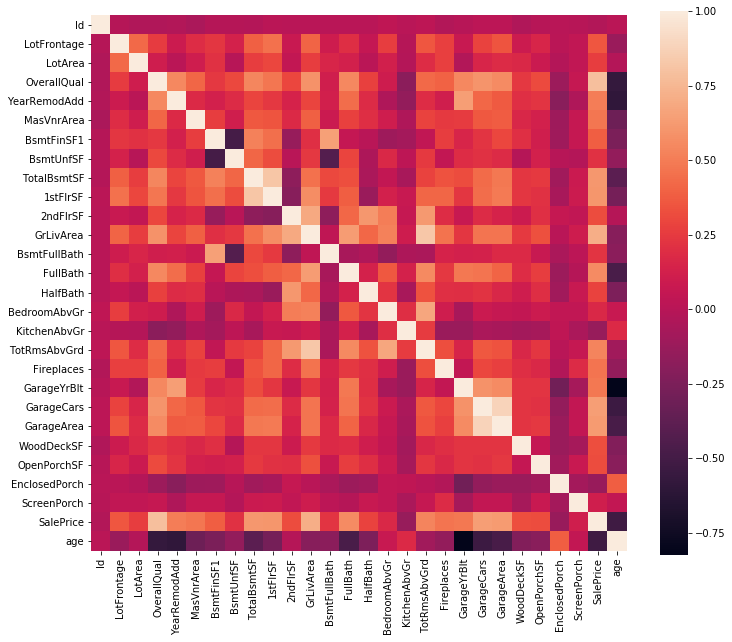

In [25]:
corr_matrix = train_df.corr()
plt.subplots(figsize = (12,10))
sns.heatmap(corr_matrix, vmax=1, square = True)

In [26]:
# Let's work on removing multicollinearity
# we can see that TotalBsmtSF and 1stFlrSF are highly correlated,lets retain TotalBsmtSF
# wecan see that 2ndFlrSF and GrLivArea are highly correlated, lets retaiain GrLivArea
# TotRmsAbvGrd is also highly correlated with GrLivArea, lets remove TotRmsAbvGrd
# GarageYrBlt, GarageCars and GarageArea show high collienarity, lets retain only GarageCars

train_df.drop(['1stFlrSF','2ndFlrSF','TotRmsAbvGrd','GarageYrBlt','GarageArea'], axis = 1, inplace = True)



In [27]:
test_df.drop(['1stFlrSF','2ndFlrSF','TotRmsAbvGrd','GarageYrBlt','GarageArea'], axis = 1, inplace = True)

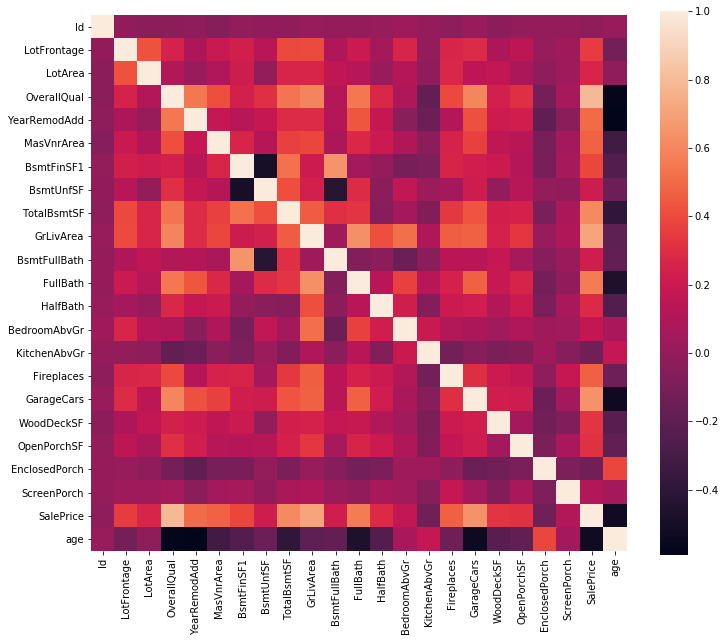

In [28]:
corr_matrix = train_df.corr()
plt.subplots(figsize = (12,10))
sns.heatmap(corr_matrix, vmax=1, square = True)

Now we can see that most of the multicollinearity is removed

In [29]:
train_df.shape

(1460, 66)

In [30]:
test_df.shape

(1459, 65)

In [31]:
cat_cols = list(train_df.select_dtypes(include='object'))
num_cols = list(train_df.select_dtypes(exclude='object'))

In [32]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [33]:
num_cols

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice',
 'age']

In [34]:
for col in cat_cols:
    print(col+" : ", train_df[col].unique(), len(train_df[col].unique()))

MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH'] 5
Street :  ['Pave' 'Grvl'] 2
Alley :  [nan 'Grvl' 'Pave'] 3
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3'] 4
LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS'] 4
Utilities :  ['AllPub' 'NoSeWa'] 2
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 5
LandSlope :  ['Gtl' 'Mod' 'Sev'] 3
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 25
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 9
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 8
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 5
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 8
RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 6
RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdShak

In [35]:
# Street: Type of road access to property either gravel or paved, most will choose paved way and can give more weight to this type. Lets replace the values with 1 and 0

train_df['Street'] = train_df['Street'].replace({'Grvl':0, 'Pave': 1})

In [36]:
test_df['Street'] = test_df['Street'].replace({'Grvl':0, 'Pave': 1})

In [37]:
# Alley: Type of alley access to property. This also follows the same logic as street, lets encode accordingly, but lets just put in
# 0 for no access and 1 for Grvl and Paved

train_df['Alley'] = train_df['Alley'].replace( {np.nan:0,'Grvl':1, 'Pave':1 })

In [38]:
test_df['Alley'] = test_df['Alley'].replace( {np.nan:0,'Grvl':1, 'Pave':1 })

In [39]:
train_df['Alley'].unique()

array([0, 1])

In [40]:
test_df['Alley'].unique()

array([0, 1])

In [41]:
# LotShape: General shape of the property. Let's categorize this into two types, regular(Reg) and irregular(Irr) then use one-hot encoding

train_df['LotShape'] = train_df['LotShape'].replace( {'Reg':'Reg', 'IR1':'Irr', 'IR2':'Irr', 'IR3':'Irr'} )
train_df = pd.get_dummies(data = train_df, columns = ['LotShape'])

In [42]:
test_df['LotShape'] = test_df['LotShape'].replace( {'Reg':'Reg', 'IR1':'Irr', 'IR2':'Irr', 'IR3':'Irr'} )
test_df = pd.get_dummies(data = test_df, columns = ['LotShape'])

In [43]:
# LandContour: Flatness of the property, it takes 4 different values, but let's change the name to IsLevel and represent with 1 if level and 0 if not

train_df = train_df.rename(columns={'LandContour':'IsLevel'})
train_df['IsLevel'] = train_df['IsLevel'].replace( {'Lvl':1, 'Bnk':0, 'Low':0, 'HLS':0} )

In [44]:
test_df = test_df.rename(columns={'LandContour':'IsLevel'})
test_df['IsLevel'] = test_df['IsLevel'].replace( {'Lvl':1, 'Bnk':0, 'Low':0, 'HLS':0} )

In [45]:
# Utilities: It has only 2 unique values, AllPub & NoSeWa. Let's rename the column to AllUtilities and represent with 1 for all and 0 for partial

train_df = train_df.rename(columns={'Utilities': 'AllUtilities'})
train_df['AllUtilities'] = train_df['AllUtilities'].replace( {'AllPub':1, 'NoSeWa':0} )

In [46]:
test_df = test_df.rename(columns={'Utilities': 'AllUtilities'})
test_df['AllUtilities'] = test_df['AllUtilities'].replace( {'AllPub':1, 'NoSeWa':0} )

In [47]:
# LotConfig: It can take 5 Unique values and it will affect the property price, let's use get_Dummies to represent in one-hot encoding format
train_df = pd.get_dummies(data = train_df, columns= ['LotConfig'])

In [48]:
test_df = pd.get_dummies(data = test_df, columns= ['LotConfig'])

In [49]:
# LandSlope and LandContour looks to be similar, let's drop Landslope from the attributes list

train_df.drop('LandSlope',axis = 1, inplace = True)

In [50]:
test_df.drop('LandSlope',axis = 1, inplace = True)

In [51]:
#Neighborhood : Let's use one hot encoding for this attribute 
train_df = pd.get_dummies(data = train_df, columns= ['Neighborhood'])

In [52]:
test_df = pd.get_dummies(data = test_df, columns= ['Neighborhood'])

In [53]:
# Proximity to various conditions depends on Neighbourhood, so let's drop the columns Condition1 & Condition2

train_df.drop( ['Condition1','Condition2'] ,axis = 1, inplace = True)

In [54]:
test_df.drop( ['Condition1','Condition2'] ,axis = 1, inplace = True)

In [55]:
# BldgType : Let's use Get_dummies
train_df = pd.get_dummies(data = train_df, columns=['BldgType','HouseStyle','RoofStyle','RoofMatl'])

In [56]:
test_df = pd.get_dummies(data = test_df, columns=['BldgType','HouseStyle','RoofStyle','RoofMatl'])

In [57]:
# Exterior1st and Exterior2nd are type of exterior covering on the house and exterior quality "ExterQual" depends on the type of material used
# Let's drop Exterior1st and Exterior2nd and apply pd.get_dummies on ExterQual

train_df.drop( ['Exterior1st','Exterior2nd'] ,axis = 1, inplace = True)
train_df = pd.get_dummies(data = train_df, columns=['ExterQual'])

In [58]:
test_df.drop( ['Exterior1st','Exterior2nd'] ,axis = 1, inplace = True)
test_df = pd.get_dummies(data = test_df, columns=['ExterQual'])

In [59]:
# MasVnrType, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure. Let's handle the null values accordingly and use pd.get_dummies

# Let's treat missing values for MasVnrType as None (Assuming missing values means there is no vnr used) 
train_df['MasVnrType'] = train_df['MasVnrType'].replace( {np.nan:'None'} )
train_df = pd.get_dummies(data = train_df, columns=['MasVnrType'])

# ExterCond has no missing values, lets use get_dummies
train_df = pd.get_dummies(data = train_df, columns=['ExterCond'])

# Foundation has no missing values, lets use get_dummies
train_df = pd.get_dummies(data = train_df, columns=['Foundation'])

# Let's treat missing values for BsmtQual as None (No basement)
train_df['BsmtQual'] = train_df['BsmtQual'].replace( {np.nan:'None'} )
train_df = pd.get_dummies(data = train_df, columns=['BsmtQual'])

# Let's treat missing values for BsmtCond as None (No basement)
train_df['BsmtCond'] = train_df['BsmtCond'].replace( {np.nan:'None'} )
train_df = pd.get_dummies(data = train_df, columns=['BsmtCond'])

# Let's treat missing values for BsmtExposure as None (No basement) in line with the representation for other related attribute
train_df['BsmtExposure'] = train_df['BsmtExposure'].replace( {np.nan:'None'} )
train_df = pd.get_dummies(data = train_df, columns=['BsmtExposure'])

# Let's drop BsmtFinType1 and BsmtFinType2 as these seems to be related to BsmtQual
train_df.drop( ['BsmtFinType1','BsmtFinType2'] ,axis = 1, inplace = True)


In [60]:
# MasVnrType, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure. Let's handle the null values accordingly and use pd.get_dummies

# Let's treat missing values for MasVnrType as None (Assuming missing values means there is no vnr used) 
test_df['MasVnrType'] = test_df['MasVnrType'].replace( {np.nan:'None'} )
test_df = pd.get_dummies(data = test_df, columns=['MasVnrType'])

# ExterCond has no missing values, lets use get_dummies
test_df = pd.get_dummies(data = test_df, columns=['ExterCond'])

# Foundation has no missing values, lets use get_dummies
test_df = pd.get_dummies(data = test_df, columns=['Foundation'])

# Let's treat missing values for BsmtQual as None (No basement)
test_df['BsmtQual'] = test_df['BsmtQual'].replace( {np.nan:'None'} )
test_df = pd.get_dummies(data = test_df, columns=['BsmtQual'])

# Let's treat missing values for BsmtCond as None (No basement)
test_df['BsmtCond'] = test_df['BsmtCond'].replace( {np.nan:'None'} )
test_df = pd.get_dummies(data = test_df, columns=['BsmtCond'])

# Let's treat missing values for BsmtExposure as None (No basement) in line with the representation for other related attribute
test_df['BsmtExposure'] = test_df['BsmtExposure'].replace( {np.nan:'None'} )
test_df = pd.get_dummies(data = test_df, columns=['BsmtExposure'])

# Let's drop BsmtFinType1 and BsmtFinType2 as these seems to be related to BsmtQual
test_df.drop( ['BsmtFinType1','BsmtFinType2'] ,axis = 1, inplace = True)


In [61]:
# Heating, HeatingQC CentralAir None of these have missing values and CentralAir takes only 2 values. Lets use pd.get_dummies for Heating and HeatingQC and binarize CentralAir
train_df = pd.get_dummies(data = train_df, columns=['Heating'])
train_df = pd.get_dummies(data = train_df, columns=['HeatingQC'])
train_df['CentralAir'] = train_df['CentralAir'].replace( {'Y':1, 'N':0} )

In [62]:
test_df = pd.get_dummies(data = test_df, columns=['Heating'])
test_df = pd.get_dummies(data = test_df, columns=['HeatingQC'])
test_df['CentralAir'] = test_df['CentralAir'].replace( {'Y':1, 'N':0} )

In [63]:
train_df.shape

(1460, 147)

In [64]:
test_df.shape

(1459, 139)

In [65]:
# Let's check null values for Electrical attribute:
train_df['Electrical'].isnull().sum()

1

In [66]:
test_df['Electrical'].isnull().sum()

0

In [67]:
# Let's fill the null value with mode value of this attribute
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0],inplace = True)

In [68]:
train_df['Electrical'].isnull().sum()

0

In [69]:
# Let's use pd.get_dummies for Electrical
train_df = pd.get_dummies(data = train_df, columns=['Electrical'])

In [70]:
test_df = pd.get_dummies(data = test_df, columns=['Electrical'])

In [71]:
# KitchenQual: Let's drop this as we have overall quality of the house

train_df.drop(['KitchenQual'], axis = 1, inplace = True)

In [72]:
test_df.drop(['KitchenQual'], axis = 1, inplace = True)

In [73]:
train_df.shape

(1460, 150)

In [74]:
test_df.shape

(1459, 141)

In [75]:
# Functional some what similar to overallquality, let's drop it

train_df.drop(['Functional'], axis = 1, inplace = True)

In [76]:
test_df.drop(['Functional'], axis = 1, inplace = True)

In [77]:
# FireplaceQu it has null values, lets check how many are there and lets fill them with None (NO Fireplaces)

train_df['FireplaceQu'].isnull().sum()

690

In [78]:
test_df['FireplaceQu'].isnull().sum()

730

In [79]:
train_df['FireplaceQu'].fillna('None',inplace = True)

In [80]:
test_df['FireplaceQu'].fillna('None',inplace = True)

In [81]:
train_df['FireplaceQu'].isnull().sum()

0

In [82]:
test_df['FireplaceQu'].isnull().sum()

0

In [83]:
train_df = pd.get_dummies(data = train_df, columns=['FireplaceQu'])

In [84]:
test_df = pd.get_dummies(data = test_df, columns=['FireplaceQu'])

In [85]:
# Let's drop GarageType, GarageFinish as we have attributes GarageQual and GarageCond
train_df.drop(['GarageType','GarageFinish'], axis = 1, inplace = True)

In [86]:
test_df.drop(['GarageType','GarageFinish'], axis = 1, inplace = True)

In [87]:
# Let's check the count of null values for GarageQual and GarageCond
print(train_df['GarageQual'].isnull().sum())
print(train_df['GarageCond'].isnull().sum())

81
81


In [88]:
print(test_df['GarageQual'].isnull().sum())
print(test_df['GarageCond'].isnull().sum())

78
78


In [89]:
print(train_df['GarageQual'].value_counts())
print(train_df['GarageCond'].value_counts())

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


Let's check the saleprice for the missing values of GarageQual and GarageCond and fill the missing values accordingly

In [90]:
train_df[['GarageQual','GarageCond', 'SalePrice']].groupby(['GarageQual','GarageCond'])['SalePrice'].mean()

GarageQual  GarageCond
Ex          Ex            124000.000000
            TA            475000.000000
Fa          Fa            112894.350000
            Po            114750.000000
            TA            133943.083333
Gd          Gd            232967.500000
            TA            209018.000000
Po          Po            100166.666667
TA          Fa            117000.266667
            Gd            137500.000000
            TA            188502.456235
Name: SalePrice, dtype: float64

In [91]:
train_df['SalePrice'].where( (train_df['GarageCond'].isnull()) & (train_df['GarageQual'].isnull()) ).mean()

103317.28395061729

The mean value of SalePrice where the GarageQual and GarageCond attributes have null values, is 103317 which is near to the Po category for both GarageQual and GarageCond. Let's fill the null values for GarageCond and GarageQual with Po

In [92]:
train_df['GarageQual'].fillna('Po',inplace = True)
train_df['GarageCond'].fillna('Po', inplace = True)

In [93]:
test_df['GarageQual'].fillna('Po',inplace = True)
test_df['GarageCond'].fillna('Po', inplace = True)

In [94]:
print(train_df['GarageQual'].isnull().sum())
print(train_df['GarageCond'].isnull().sum())

0
0


In [95]:
print(test_df['GarageQual'].isnull().sum())
print(test_df['GarageCond'].isnull().sum())

0
0


In [96]:
# Now that we have handled Null values for GarageCond and GarageQual attributes, lets use get_dummies
train_df = pd.get_dummies(data = train_df, columns=['GarageQual','GarageCond'])

In [97]:
test_df = pd.get_dummies(data = test_df, columns=['GarageQual','GarageCond'])

In [98]:
train_df.shape

(1460, 160)

In [99]:
test_df.shape

(1459, 150)

In [100]:
# PavedDrive is having 3 unique values ('Y' 'N' 'P'), lets change it to represent either paved or not paved with 1 and 0 respectively
train_df['PavedDrive'] = train_df['PavedDrive'].replace( {'Y':1,'N':0,'P':0} )

In [101]:
test_df['PavedDrive'] = test_df['PavedDrive'].replace( {'Y':1,'N':0,'P':0} )

In [102]:
# Since we have dropped PoolArea, let's drop PoolQC as well

train_df.drop('PoolQC', axis = 1, inplace = True)

# Fence: Represents fence quality (nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw') which is also a measure of Privacy, lets modify it to represent Complete Privacy (CP), Partial Privacy(PP) and No Privacy(NP)
train_df['Fence'] = train_df['Fence'].replace( {'GdPrv':'CP', 'MnPrv':'PP', 'GdWo':'PP', 'MnWw':'NP', np.nan:'NP'} )
train_df = pd.get_dummies(data = train_df, columns=['Fence'])

# We have dropped MiscValue, so let's drop the attribute MiscFeature
train_df.drop('MiscFeature', axis = 1, inplace = True)


In [103]:
test_df.drop('PoolQC', axis = 1, inplace = True)

# Fence: Represents fence quality (nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw') which is also a measure of Privacy, lets modify it to represent Complete Privacy (CP), Partial Privacy(PP) and No Privacy(NP)
test_df['Fence'] = test_df['Fence'].replace( {'GdPrv':'CP', 'MnPrv':'PP', 'GdWo':'PP', 'MnWw':'NP', np.nan:'NP'} )
test_df = pd.get_dummies(data = test_df, columns=['Fence'])

# We have dropped MiscValue, so let's drop the attribute MiscFeature
test_df.drop('MiscFeature', axis = 1, inplace = True)

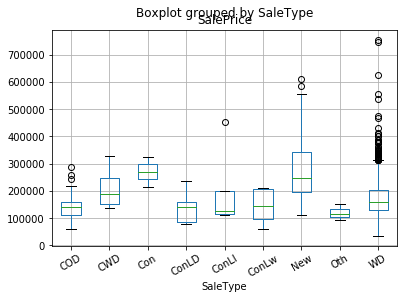

In [104]:
# let's do some checks on SaleType and SaleCondition

train_df.boxplot(column = 'SalePrice', by = 'SaleType', rot=30)

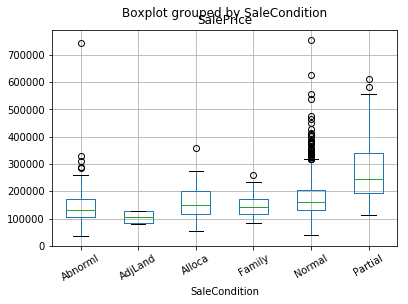

In [105]:
train_df.boxplot(column = 'SalePrice', by = 'SaleCondition', rot=30)

In [106]:
# We can not clearly makeout the pattern based on SaleCondition and SaleType except for Normal and warranty deed for which we can see a maximum sales
# Let's drop these attributes for now:

train_df.drop('SaleCondition',axis = 1, inplace = True)
train_df.drop('SaleType',axis = 1, inplace = True)


In [107]:
test_df.drop('SaleCondition',axis = 1, inplace = True)
test_df.drop('SaleType',axis = 1, inplace = True)

In [108]:
train_df.shape

(1460, 158)

In [109]:
test_df.shape

(1459, 148)

In [110]:
# Now we are left with only one categorical column MSZoning, let's work on that

train_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

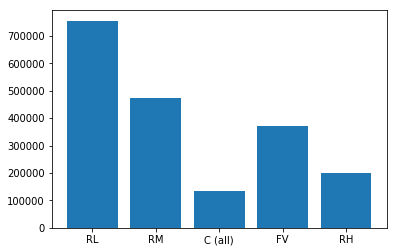

In [111]:
plt.bar(train_df['MSZoning'],train_df['SalePrice'])
plt.show()

In [112]:
# As we can see, the SalePrice varies as per the Zone classification, we must include this in our model design
train_df = pd.get_dummies(data = train_df, columns=['MSZoning'])

In [113]:
test_df = pd.get_dummies(data = test_df, columns=['MSZoning'])

In [114]:
train_df.shape

(1460, 162)

In [115]:
test_df.shape

(1459, 152)

In [116]:
train_df.isnull().sum()

Id                    0
LotFrontage         259
LotArea               0
Street                0
Alley                 0
                   ... 
MSZoning_C (all)      0
MSZoning_FV           0
MSZoning_RH           0
MSZoning_RL           0
MSZoning_RM           0
Length: 162, dtype: int64

In [117]:
test_df.isnull().sum()

Id                    0
LotFrontage         227
LotArea               0
Street                0
Alley                 0
                   ... 
MSZoning_C (all)      0
MSZoning_FV           0
MSZoning_RH           0
MSZoning_RL           0
MSZoning_RM           0
Length: 152, dtype: int64

In [118]:
# We have missing values for LotFrontage, let's see how we can fill those.
# Let's assume, LotFrontage will be dependent on LotArea,Alley,LotShape_Irr,LotShape_Reg, IsLevel, LotConfig_Corner, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside
# let's Check the correlation among them

train_df[['LotArea','Alley','LotShape_Irr','LotShape_Reg','IsLevel','LotConfig_Corner','LotConfig_CulDSac','LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside','LotFrontage']].corr()

,LotArea,Alley,LotShape_Irr,LotShape_Reg,IsLevel,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotFrontage
LotArea,1.000000,-0.075624,0.216111,-0.216111,-0.256843,0.042722,0.179440,-0.002167,-0.009511,-0.132773,0.426095
Alley,-0.075624,1.000000,-0.113755,0.113755,-0.053469,-0.010266,-0.067633,-0.047022,-0.013514,0.065854,-0.173249
LotShape_Irr,0.216111,-0.113755,1.000000,-1.000000,-0.142756,0.076297,0.339139,0.022368,-0.012666,-0.258160,0.193426
LotShape_Reg,-0.216111,0.113755,-1.000000,1.000000,0.142756,-0.076297,-0.339139,-0.022368,0.012666,0.258160,-0.193426
IsLevel,-0.256843,-0.053469,-0.142756,0.142756,1.000000,0.028498,-0.040625,0.035848,0.017670,-0.018345,-0.097246
LotConfig_Corner,0.042722,-0.010266,0.076297,-0.076297,0.028498,1.000000,-0.122962,-0.085489,-0.024569,-0.752677,0.258380
LotConfig_CulDSac,0.179440,-0.067633,0.339139,-0.339139,-0.040625,-0.122962,1.000000,-0.047843,-0.013750,-0.421227,-0.082407
LotConfig_FR2,-0.002167,-0.047022,0.022368,-0.022368,0.035848,-0.085489,-0.047843,1.000000,-0.009559,-0.292857,-0.045250
LotConfig_FR3,-0.009511,-0.013514,-0.012666,0.012666,0.017670,-0.024569,-0.013750,-0.009559,1.000000,-0.084164,0.001667
LotConfig_Inside,-0.132773,0.065854,-0.258160,0.258160,-0.018345,-0.752677,-0.421227,-0.292857,-0.084164,1.000000,-0.173192


In [119]:
train_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

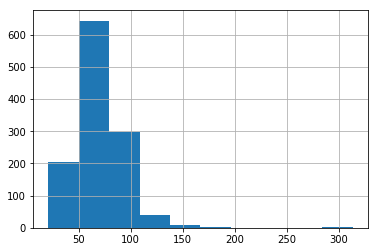

In [120]:
train_df['LotFrontage'].hist()

In [121]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(), inplace = True)

In [122]:
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(), inplace = True)

In [123]:
pd.set_option('display.max_rows',170)

In [124]:
train_df.isnull().sum()

Id                      0
LotFrontage             0
LotArea                 0
Street                  0
Alley                   0
IsLevel                 0
AllUtilities            0
OverallQual             0
YearRemodAdd            0
MasVnrArea              8
BsmtFinSF1              0
BsmtUnfSF               0
TotalBsmtSF             0
CentralAir              0
GrLivArea               0
BsmtFullBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
Fireplaces              0
GarageCars              0
PavedDrive              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
ScreenPorch             0
SalePrice               0
age                     0
LotShape_Irr            0
LotShape_Reg            0
LotConfig_Corner        0
LotConfig_CulDSac       0
LotConfig_FR2           0
LotConfig_FR3           0
LotConfig_Inside        0
Neighborhood_Blmngtn    0
Neighborhood_Blueste    0
Neighborhood

In [125]:
# There are 8 Null values for MasVnrArea, lets check the distribution

train_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

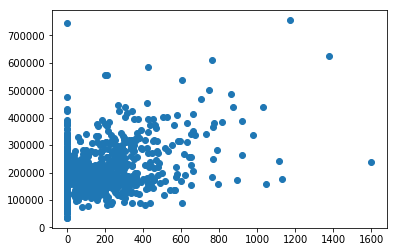

In [126]:
plt.scatter(train_df['MasVnrArea'],train_df['SalePrice'])

In [127]:
train_df[train_df.columns[1:]].corr()['SalePrice'][:]

LotFrontage             0.334901
LotArea                 0.263843
Street                  0.041036
Alley                  -0.123611
IsLevel                -0.027545
AllUtilities            0.014314
OverallQual             0.790982
YearRemodAdd            0.507101
MasVnrArea              0.477493
BsmtFinSF1              0.386420
BsmtUnfSF               0.214479
TotalBsmtSF             0.613581
CentralAir              0.251328
GrLivArea               0.708624
BsmtFullBath            0.227122
FullBath                0.560664
HalfBath                0.284108
BedroomAbvGr            0.168213
KitchenAbvGr           -0.135907
Fireplaces              0.466929
GarageCars              0.640409
PavedDrive              0.231968
WoodDeckSF              0.324413
OpenPorchSF             0.315856
EnclosedPorch          -0.128578
ScreenPorch             0.111447
SalePrice               1.000000
age                    -0.523350
LotShape_Irr            0.267672
LotShape_Reg           -0.267672
LotConfig_

Let's Find some outliers and remove them from our dataset

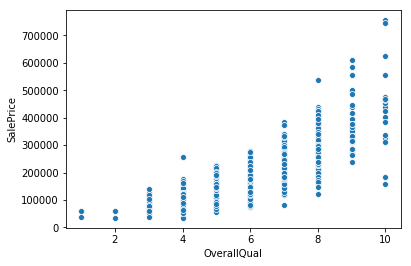

In [128]:
sns.scatterplot(x = 'OverallQual', y = 'SalePrice', data=train_df)

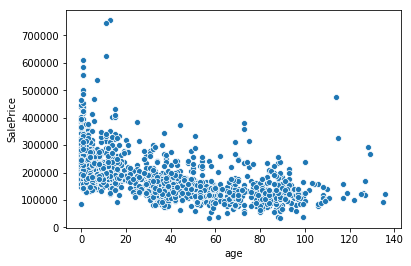

In [129]:
sns.scatterplot(x = 'age', y = 'SalePrice', data=train_df)

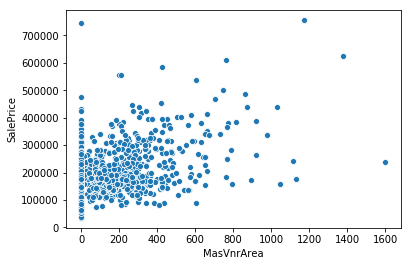

In [130]:
sns.scatterplot(x = 'MasVnrArea', y = 'SalePrice', data=train_df)

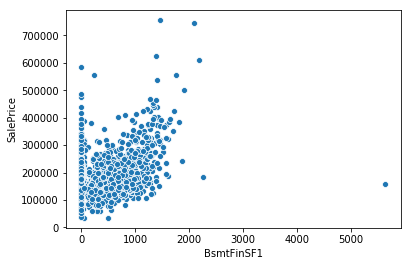

In [131]:
sns.scatterplot(x = 'BsmtFinSF1', y = 'SalePrice', data=train_df)

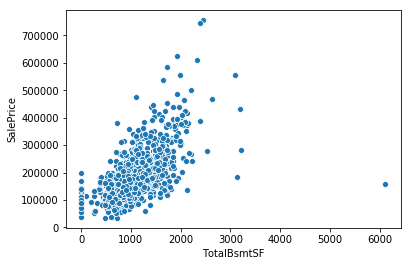

In [132]:
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data=train_df)

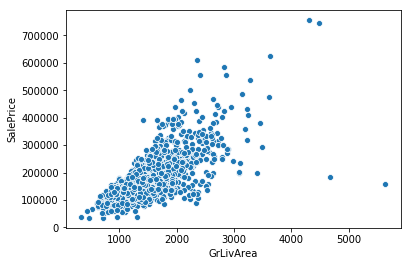

In [133]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data=train_df)

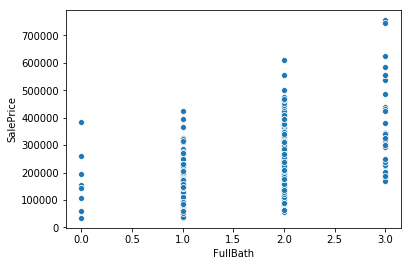

In [134]:
sns.scatterplot(x = 'FullBath', y = 'SalePrice', data=train_df)

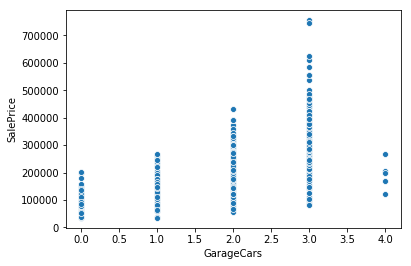

In [135]:
sns.scatterplot(x = 'GarageCars', y = 'SalePrice', data=train_df)

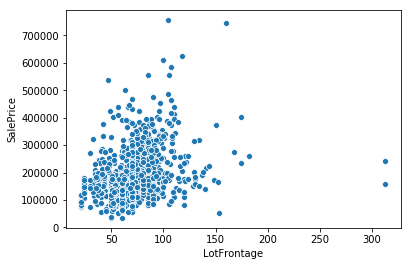

In [136]:
sns.scatterplot(x = 'LotFrontage', y = 'SalePrice', data=train_df)

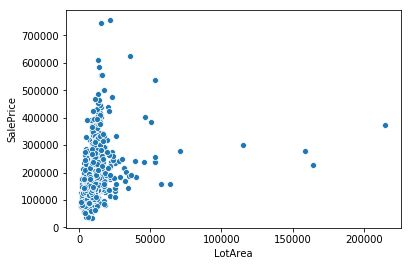

In [137]:
sns.scatterplot(x = 'LotArea', y = 'SalePrice', data=train_df)

If we look at the scatter plots, for attribute GarageCars there seems to be no outliers.
For attribute TotalBsmtSF let's drop the records with TotalBsmtSF > 3000
For attribute age let's drop the records with age >100 and salesprice > 300000
for attribute GrLivArea let's drop the records with area > 4000 and salesprice < 300000
for OverallQual which is ordinal attribute, let's drop the records with overallqual > 9 and sales price > 700000

In [138]:
train_df.drop( train_df[ (train_df['OverallQual'] > 9) & (train_df['SalePrice'] < 200000) ].index, inplace = True)

In [139]:
train_df.drop( train_df[ (train_df['age'] > 100) & (train_df['SalePrice'] > 300000) ].index, inplace = True)

In [140]:
train_df.drop( train_df[ (train_df['MasVnrArea'] > 1200) & (train_df['SalePrice'] < 700000) ].index, inplace = True)

In [141]:
train_df.drop( train_df[ (train_df['BsmtFinSF1'] > 2000) & (train_df['SalePrice'] < 200000) ].index, inplace = True)

In [142]:
train_df.drop( train_df[ (train_df['TotalBsmtSF'] > 3000) & (train_df['SalePrice'] < 300000) ].index, inplace = True)

In [143]:
train_df.drop( train_df[ (train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000) ].index, inplace = True)

In [144]:
train_df.drop( train_df[ (train_df['FullBath'] < 1) & (train_df['SalePrice'] > 300000) ].index, inplace = True)

In [145]:
train_df.drop( train_df[ (train_df['LotFrontage'] > 200) & (train_df['SalePrice'] < 300000) ].index, inplace = True)

In [146]:
train_df.shape

(1451, 162)

In [147]:
train_df.isnull().sum()

Id                      0
LotFrontage             0
LotArea                 0
Street                  0
Alley                   0
IsLevel                 0
AllUtilities            0
OverallQual             0
YearRemodAdd            0
MasVnrArea              8
BsmtFinSF1              0
BsmtUnfSF               0
TotalBsmtSF             0
CentralAir              0
GrLivArea               0
BsmtFullBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
Fireplaces              0
GarageCars              0
PavedDrive              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
ScreenPorch             0
SalePrice               0
age                     0
LotShape_Irr            0
LotShape_Reg            0
LotConfig_Corner        0
LotConfig_CulDSac       0
LotConfig_FR2           0
LotConfig_FR3           0
LotConfig_Inside        0
Neighborhood_Blmngtn    0
Neighborhood_Blueste    0
Neighborhood

We have null values and lets impute them

In [148]:
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(), inplace = True)

In [149]:
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean(), inplace = True)

In [150]:
train_df.head()

,Id,LotFrontage,LotArea,Street,Alley,IsLevel,AllUtilities,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,age,LotShape_Irr,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,BsmtExposure_No,BsmtExposure_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_CP,Fence_NP,Fence_PP,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,65.0,8450,1,0,1,1,7,2003,196.0,706,150,856,1,1710,1,2,1,3,1,0,2,1,0,61,0,0,208500,5,0,1,0,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
1,2,80.0,9600,1,0,1,1,6,1976,0.0,978,284,1262,1,1262,0,2,0,3,1,1,2,1,298,0,0,0,181500,31,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,3,68.0,11250,1,0,1,1,7,2002,162.0,486,434,920,1,1786,1,2,1,3,1,1,2,1,0,42,0,0,223500,7,1,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
3,4,60.0,9550,1,0,1,1,7,1970,0.0,216,540,756,1,1717,1,1,0,3,1,1,3,1,0,35,272,0,140000,91,1,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
4,5,84.0,14260,1,0,1,1,8,2000,350.0,655,490,1145,1,2198,1,2,1,4,1,1,3,1,192,84,0,0,250000,8,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [151]:
train_df_p = pd.DataFrame(normalize(train_df.drop(['Id','SalePrice'], axis = 1)), columns = train_df.drop(['Id','SalePrice'],axis = 1).columns)

In [152]:
test_df.head()

,Id,LotFrontage,LotArea,Street,Alley,IsLevel,AllUtilities,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,age,LotShape_Irr,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_CP,Fence_NP,Fence_PP,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1461,80.0,11622,1,0,1,1,5,1961,0.0,468.0,270.0,882.0,1,896,0.0,1,0,2,1,0,1.0,1,140,0,0,120,49,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,1462,81.0,14267,1,0,1,1,6,1958,108.0,923.0,406.0,1329.0,1,1329,0.0,1,1,3,1,0,1.0,1,393,36,0,0,52,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1463,74.0,13830,1,0,1,1,5,1998,0.0,791.0,137.0,928.0,1,1629,0.0,2,1,3,1,1,2.0,1,212,34,0,0,13,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1464,78.0,9978,1,0,1,1,6,1998,20.0,602.0,324.0,926.0,1,1604,0.0,2,1,3,1,1,2.0,1,360,36,0,0,12,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
4,1465,43.0,5005,1,0,0,1,8,1992,0.0,263.0,1017.0,1280.0,1,1280,0.0,2,0,2,1,0,2.0,1,0,82,0,144,18,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [153]:
test_df.isnull().sum()

Id                      0
LotFrontage             0
LotArea                 0
Street                  0
Alley                   0
IsLevel                 0
AllUtilities            2
OverallQual             0
YearRemodAdd            0
MasVnrArea              0
BsmtFinSF1              1
BsmtUnfSF               1
TotalBsmtSF             1
CentralAir              0
GrLivArea               0
BsmtFullBath            2
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
Fireplaces              0
GarageCars              1
PavedDrive              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
ScreenPorch             0
age                     0
LotShape_Irr            0
LotShape_Reg            0
LotConfig_Corner        0
LotConfig_CulDSac       0
LotConfig_FR2           0
LotConfig_FR3           0
LotConfig_Inside        0
Neighborhood_Blmngtn    0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood

In [154]:
test_df['AllUtilities'].fillna(test_df['AllUtilities'].mean(), inplace = True)

In [155]:
test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean(), inplace = True)

In [156]:
test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean(), inplace = True)

In [157]:
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean(), inplace = True)

In [158]:
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean(), inplace = True)

In [159]:
test_df['GarageCars'].fillna(test_df['GarageCars'].mean(), inplace = True)

In [160]:
test_df_p = pd.DataFrame(normalize(test_df.drop('Id', axis = 1)), columns = test_df.drop('Id',axis = 1).columns)

In [161]:
train_df_p.head()

,LotFrontage,LotArea,Street,Alley,IsLevel,AllUtilities,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,age,LotShape_Irr,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,BsmtExposure_No,BsmtExposure_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_CP,Fence_NP,Fence_PP,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.007284,0.946879,0.000112,0.0,0.000112,0.000112,0.000784,0.224450,0.021963,0.079112,0.016809,0.095921,0.000112,0.191617,0.000112,0.000224,0.000112,0.000336,0.000112,0.000000,0.000224,0.000112,0.000000,0.006835,0.000000,0.0,0.000560,0.000000,0.000112,0.0000,0.0,0.000000,0.0,0.000112,0.0,0.0,0.0,0.0,0.0,0.000112,0.0000,0.0,...,0.000112,0.0,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000112,0.0,0.0,0.0000,0.000112,0.0,0.000000,0.0,0.0,0.0,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0
1,0.007985,0.958166,0.000100,0.0,0.000100,0.000100,0.000599,0.197222,0.000000,0.097613,0.028346,0.125959,0.000100,0.125959,0.000000,0.000200,0.000000,0.000299,0.000100,0.000100,0.000200,0.000100,0.029743,0.000000,0.000000,0.0,0.003094,0.000000,0.000100,0.0000,0.0,0.000100,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,...,0.000000,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0000,0.000000,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0
2,0.005851,0.968016,0.000086,0.0,0.000086,0.000086,0.000602,0.172264,0.013939,0.041818,0.037344,0.079162,0.000086,0.153678,0.000086,0.000172,0.000086,0.000258,0.000086,0.000086,0.000172,0.000086,0.000000,0.003614,0.000000,0.0,0.000602,0.000086,0.000000,0.0000,0.0,0.000000,0.0,0.000086,0.0,0.0,0.0,0.0,0.0,0.000086,0.0000,0.0,...,0.000000,0.0,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.0000,0.000000,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0
3,0.006029,0.959673,0.000100,0.0,0.000100,0.000100,0.000703,0.197964,0.000000,0.021706,0.054264,0.075970,0.000100,0.172540,0.000100,0.000100,0.000000,0.000301,0.000100,0.000100,0.000301,0.000100,0.000000,0.003517,0.027333,0.0,0.009145,0.000100,0.000000,0.0001,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0001,0.0,...,0.000100,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000000,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0001,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0
4,0.005738,0.974037,0.000068,0.0,0.000068,0.000068,0.000546,0.136611,0.023907,0.044740,0.033470,0.078210,0.000068,0.150136,0.000068,0.000137,0.000068,0.000273,0.000068,0.000068,0.000205,0.000068,0.013115,0.005738,0.000000,0.0,0.000546,0.000068,0.000000,0.0000,0.0,0.000068,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,...,0.000000,0.0,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000068,0.0,0.0,0.0000,0.000000,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0


In [162]:
test_df_p.head()

,LotFrontage,LotArea,Street,Alley,IsLevel,AllUtilities,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,age,LotShape_Irr,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_CP,Fence_NP,Fence_PP,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.006741,0.979333,0.000084,0.0,0.000084,0.000084,0.000421,0.165245,0.000000,0.039436,0.022752,0.074322,0.000084,0.075502,0.0,0.000084,0.000000,0.000169,0.000084,0.000000,0.000084,0.000084,0.011797,0.000000,0.0,0.010112,0.004129,0.000000,0.000084,0.000000,0.0,0.0,0.0,0.000084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000084,0.0,0.0,0.0,0.000084,0.0,0.000084,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000084,0.0,0.0,0.0,0.000084,0.0,0.0,0.000000,0.000084,0.0,0.000000,0.0,0.0,0.0,0.000084,0.0,0.0,0.0,0.0,0.000084,0.0,0.000000,0.000084,0.0,0.0,0.000084,0.000000,0.0
1,0.005562,0.979614,0.000069,0.0,0.000069,0.000069,0.000412,0.134442,0.007416,0.063376,0.027877,0.091253,0.000069,0.091253,0.0,0.000069,0.000069,0.000206,0.000069,0.000000,0.000069,0.000069,0.026985,0.002472,0.0,0.000000,0.003570,0.000069,0.000000,0.000069,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000069,0.0,0.0,0.0,0.000069,0.0,0.000069,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000069,0.0,0.0,0.0,0.000069,0.0,0.0,0.000000,0.000069,0.0,0.000000,0.0,0.0,0.0,0.000069,0.0,0.0,0.0,0.0,0.000069,0.0,0.000069,0.000000,0.0,0.0,0.000000,0.000069,0.0
2,0.005240,0.979222,0.000071,0.0,0.000071,0.000071,0.000354,0.141467,0.000000,0.056006,0.009700,0.065706,0.000071,0.115340,0.0,0.000142,0.000071,0.000212,0.000071,0.000071,0.000142,0.000071,0.015010,0.002407,0.0,0.000000,0.000920,0.000071,0.000000,0.000000,0.0,0.0,0.0,0.000071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000071,0.0,0.0,0.0,0.000071,0.0,0.000071,0.0,0.0,0.0,0.000000,0.0,0.000071,0.0,0.000000,0.0,0.0,0.0,0.000071,0.0,0.0,0.000000,0.000000,0.0,0.000071,0.0,0.0,0.0,0.000071,0.0,0.0,0.0,0.0,0.000071,0.0,0.000000,0.000071,0.0,0.0,0.000000,0.000071,0.0
3,0.007520,0.961971,0.000096,0.0,0.000096,0.000096,0.000578,0.192626,0.001928,0.058038,0.031237,0.089275,0.000096,0.154640,0.0,0.000193,0.000096,0.000289,0.000096,0.000096,0.000193,0.000096,0.034707,0.003471,0.0,0.000000,0.001157,0.000096,0.000000,0.000000,0.0,0.0,0.0,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000096,0.0,0.0,0.0,0.000096,0.0,0.000096,0.0,0.0,0.0,0.000096,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000096,0.0,0.0,0.000096,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000096,0.0,0.0,0.0,0.0,0.000096,0.0,0.000096,0.000000,0.0,0.0,0.000000,0.000096,0.0
4,0.007437,0.865662,0.000173,0.0,0.000000,0.000173,0.001384,0.344535,0.000000,0.045488,0.175900,0.221388,0.000173,0.221388,0.0,0.000346,0.000000,0.000346,0.000173,0.000000,0.000346,0.000173,0.000000,0.014183,0.0,0.024906,0.003113,0.000173,0.000000,0.000000,0.0,0.0,0.0,0.000173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000173,0.0,0.0,0.0,0.000173,0.0,0.000173,0.0,0.0,0.0,0.000173,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000173,0.0,0.0,0.000000,0.000173,0.0,0.000000,0.0,0.0,0.0,0.000173,0.0,0.0,0.0,0.0,0.000173,0.0,0.000173,0.000000,0.0,0.0,0.000000,0.000173,0.0


In [163]:
train_df_p.reset_index(inplace = True)

In [164]:
train_df.reset_index(inplace = True)

In [165]:
train_df_p['SalePrice'] = train_df['SalePrice']

In [166]:
train_df_p.shape

(1451, 162)

In [167]:
train_df_p.head()

,index,LotFrontage,LotArea,Street,Alley,IsLevel,AllUtilities,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,age,LotShape_Irr,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtExposure_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_CP,Fence_NP,Fence_PP,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SalePrice
0,0,0.007284,0.946879,0.000112,0.0,0.000112,0.000112,0.000784,0.224450,0.021963,0.079112,0.016809,0.095921,0.000112,0.191617,0.000112,0.000224,0.000112,0.000336,0.000112,0.000000,0.000224,0.000112,0.000000,0.006835,0.000000,0.0,0.000560,0.000000,0.000112,0.0000,0.0,0.000000,0.0,0.000112,0.0,0.0,0.0,0.0,0.0,0.000112,0.0000,...,0.0,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000112,0.0,0.0,0.0000,0.000112,0.0,0.000000,0.0,0.0,0.0,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0,208500
1,1,0.007985,0.958166,0.000100,0.0,0.000100,0.000100,0.000599,0.197222,0.000000,0.097613,0.028346,0.125959,0.000100,0.125959,0.000000,0.000200,0.000000,0.000299,0.000100,0.000100,0.000200,0.000100,0.029743,0.000000,0.000000,0.0,0.003094,0.000000,0.000100,0.0000,0.0,0.000100,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,...,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0000,0.000000,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,181500
2,2,0.005851,0.968016,0.000086,0.0,0.000086,0.000086,0.000602,0.172264,0.013939,0.041818,0.037344,0.079162,0.000086,0.153678,0.000086,0.000172,0.000086,0.000258,0.000086,0.000086,0.000172,0.000086,0.000000,0.003614,0.000000,0.0,0.000602,0.000086,0.000000,0.0000,0.0,0.000000,0.0,0.000086,0.0,0.0,0.0,0.0,0.0,0.000086,0.0000,...,0.0,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.0000,0.000000,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,223500
3,3,0.006029,0.959673,0.000100,0.0,0.000100,0.000100,0.000703,0.197964,0.000000,0.021706,0.054264,0.075970,0.000100,0.172540,0.000100,0.000100,0.000000,0.000301,0.000100,0.000100,0.000301,0.000100,0.000000,0.003517,0.027333,0.0,0.009145,0.000100,0.000000,0.0001,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0001,...,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000000,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0001,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,140000
4,4,0.005738,0.974037,0.000068,0.0,0.000068,0.000068,0.000546,0.136611,0.023907,0.044740,0.033470,0.078210,0.000068,0.150136,0.000068,0.000137,0.000068,0.000273,0.000068,0.000068,0.000205,0.000068,0.013115,0.005738,0.000000,0.0,0.000546,0.000068,0.000000,0.0000,0.0,0.000068,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,...,0.0,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000068,0.0,0.0,0.0000,0.000000,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,250000


In [168]:
train_df_p.drop('index', axis = 1, inplace = True)

In [169]:
train_df_p.shape

(1451, 161)

In [170]:
train_df_p.head()

,LotFrontage,LotArea,Street,Alley,IsLevel,AllUtilities,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,age,LotShape_Irr,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,BsmtExposure_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_CP,Fence_NP,Fence_PP,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SalePrice
0,0.007284,0.946879,0.000112,0.0,0.000112,0.000112,0.000784,0.224450,0.021963,0.079112,0.016809,0.095921,0.000112,0.191617,0.000112,0.000224,0.000112,0.000336,0.000112,0.000000,0.000224,0.000112,0.000000,0.006835,0.000000,0.0,0.000560,0.000000,0.000112,0.0000,0.0,0.000000,0.0,0.000112,0.0,0.0,0.0,0.0,0.0,0.000112,0.0000,0.0,...,0.0,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000112,0.0,0.0,0.0000,0.000112,0.0,0.000000,0.0,0.0,0.0,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0,208500
1,0.007985,0.958166,0.000100,0.0,0.000100,0.000100,0.000599,0.197222,0.000000,0.097613,0.028346,0.125959,0.000100,0.125959,0.000000,0.000200,0.000000,0.000299,0.000100,0.000100,0.000200,0.000100,0.029743,0.000000,0.000000,0.0,0.003094,0.000000,0.000100,0.0000,0.0,0.000100,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,...,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0000,0.000000,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,181500
2,0.005851,0.968016,0.000086,0.0,0.000086,0.000086,0.000602,0.172264,0.013939,0.041818,0.037344,0.079162,0.000086,0.153678,0.000086,0.000172,0.000086,0.000258,0.000086,0.000086,0.000172,0.000086,0.000000,0.003614,0.000000,0.0,0.000602,0.000086,0.000000,0.0000,0.0,0.000000,0.0,0.000086,0.0,0.0,0.0,0.0,0.0,0.000086,0.0000,0.0,...,0.0,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.0000,0.000000,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,223500
3,0.006029,0.959673,0.000100,0.0,0.000100,0.000100,0.000703,0.197964,0.000000,0.021706,0.054264,0.075970,0.000100,0.172540,0.000100,0.000100,0.000000,0.000301,0.000100,0.000100,0.000301,0.000100,0.000000,0.003517,0.027333,0.0,0.009145,0.000100,0.000000,0.0001,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0001,0.0,...,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000000,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0001,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,140000
4,0.005738,0.974037,0.000068,0.0,0.000068,0.000068,0.000546,0.136611,0.023907,0.044740,0.033470,0.078210,0.000068,0.150136,0.000068,0.000137,0.000068,0.000273,0.000068,0.000068,0.000205,0.000068,0.013115,0.005738,0.000000,0.0,0.000546,0.000068,0.000000,0.0000,0.0,0.000068,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,...,0.0,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000068,0.0,0.0,0.0000,0.000000,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,250000


In [171]:
test_df_p.head()

,LotFrontage,LotArea,Street,Alley,IsLevel,AllUtilities,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,age,LotShape_Irr,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_CP,Fence_NP,Fence_PP,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.006741,0.979333,0.000084,0.0,0.000084,0.000084,0.000421,0.165245,0.000000,0.039436,0.022752,0.074322,0.000084,0.075502,0.0,0.000084,0.000000,0.000169,0.000084,0.000000,0.000084,0.000084,0.011797,0.000000,0.0,0.010112,0.004129,0.000000,0.000084,0.000000,0.0,0.0,0.0,0.000084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000084,0.0,0.0,0.0,0.000084,0.0,0.000084,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000084,0.0,0.0,0.0,0.000084,0.0,0.0,0.000000,0.000084,0.0,0.000000,0.0,0.0,0.0,0.000084,0.0,0.0,0.0,0.0,0.000084,0.0,0.000000,0.000084,0.0,0.0,0.000084,0.000000,0.0
1,0.005562,0.979614,0.000069,0.0,0.000069,0.000069,0.000412,0.134442,0.007416,0.063376,0.027877,0.091253,0.000069,0.091253,0.0,0.000069,0.000069,0.000206,0.000069,0.000000,0.000069,0.000069,0.026985,0.002472,0.0,0.000000,0.003570,0.000069,0.000000,0.000069,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000069,0.0,0.0,0.0,0.000069,0.0,0.000069,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000069,0.0,0.0,0.0,0.000069,0.0,0.0,0.000000,0.000069,0.0,0.000000,0.0,0.0,0.0,0.000069,0.0,0.0,0.0,0.0,0.000069,0.0,0.000069,0.000000,0.0,0.0,0.000000,0.000069,0.0
2,0.005240,0.979222,0.000071,0.0,0.000071,0.000071,0.000354,0.141467,0.000000,0.056006,0.009700,0.065706,0.000071,0.115340,0.0,0.000142,0.000071,0.000212,0.000071,0.000071,0.000142,0.000071,0.015010,0.002407,0.0,0.000000,0.000920,0.000071,0.000000,0.000000,0.0,0.0,0.0,0.000071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000071,0.0,0.0,0.0,0.000071,0.0,0.000071,0.0,0.0,0.0,0.000000,0.0,0.000071,0.0,0.000000,0.0,0.0,0.0,0.000071,0.0,0.0,0.000000,0.000000,0.0,0.000071,0.0,0.0,0.0,0.000071,0.0,0.0,0.0,0.0,0.000071,0.0,0.000000,0.000071,0.0,0.0,0.000000,0.000071,0.0
3,0.007520,0.961971,0.000096,0.0,0.000096,0.000096,0.000578,0.192626,0.001928,0.058038,0.031237,0.089275,0.000096,0.154640,0.0,0.000193,0.000096,0.000289,0.000096,0.000096,0.000193,0.000096,0.034707,0.003471,0.0,0.000000,0.001157,0.000096,0.000000,0.000000,0.0,0.0,0.0,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000096,0.0,0.0,0.0,0.000096,0.0,0.000096,0.0,0.0,0.0,0.000096,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000096,0.0,0.0,0.000096,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000096,0.0,0.0,0.0,0.0,0.000096,0.0,0.000096,0.000000,0.0,0.0,0.000000,0.000096,0.0
4,0.007437,0.865662,0.000173,0.0,0.000000,0.000173,0.001384,0.344535,0.000000,0.045488,0.175900,0.221388,0.000173,0.221388,0.0,0.000346,0.000000,0.000346,0.000173,0.000000,0.000346,0.000173,0.000000,0.014183,0.0,0.024906,0.003113,0.000173,0.000000,0.000000,0.0,0.0,0.0,0.000173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000173,0.0,0.0,0.0,0.000173,0.0,0.000173,0.0,0.0,0.0,0.000173,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000173,0.0,0.0,0.000000,0.000173,0.0,0.000000,0.0,0.0,0.0,0.000173,0.0,0.0,0.0,0.0,0.000173,0.0,0.000173,0.000000,0.0,0.0,0.000000,0.000173,0.0


In [172]:
# Let's get the difference in columns between train_df_p and test_df_p 
train_df_p.columns.difference(test_df_p.columns)   

Index(['Electrical_Mix', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'SalePrice'],
      dtype='object')

In [173]:
# We will have to train our model keeping attributes from Test set as well in mind. Let's drop the above attributes from train_df_p
train_df_p.drop(['Electrical_Mix', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW','HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran','RoofMatl_Metal', 'RoofMatl_Roll'], axis = 1, inplace = True)

In [174]:
# Let's again check the attributes from both sets (train and test)
print(train_df_p.shape)
print(test_df_p.shape)

(1451, 152)
(1459, 151)


In [175]:
# Let's get the difference in columns between train_df_p and test_df_p 
train_df_p.columns.difference(test_df_p.columns)

Index(['SalePrice'], dtype='object')

Now, only SalePrice is missing from test_df_p which we have to predict

In [176]:
train_df_p.head()

,LotFrontage,LotArea,Street,Alley,IsLevel,AllUtilities,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,age,LotShape_Irr,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_CP,Fence_NP,Fence_PP,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SalePrice
0,0.007284,0.946879,0.000112,0.0,0.000112,0.000112,0.000784,0.224450,0.021963,0.079112,0.016809,0.095921,0.000112,0.191617,0.000112,0.000224,0.000112,0.000336,0.000112,0.000000,0.000224,0.000112,0.000000,0.006835,0.000000,0.0,0.000560,0.000000,0.000112,0.0000,0.0,0.000000,0.0,0.000112,0.0,0.0,0.0,0.0,0.0,0.000112,0.0000,0.0,...,0.000000,0.0000,0.000000,0.000112,0.0,0.000112,0.0,0.0,0.0,0.000112,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000112,0.0,0.0,0.0000,0.000112,0.0,0.000000,0.0,0.0,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0,0.000112,0.0,0.0,0.0,0.0,0.000112,0.0,208500
1,0.007985,0.958166,0.000100,0.0,0.000100,0.000100,0.000599,0.197222,0.000000,0.097613,0.028346,0.125959,0.000100,0.125959,0.000000,0.000200,0.000000,0.000299,0.000100,0.000100,0.000200,0.000100,0.029743,0.000000,0.000000,0.0,0.003094,0.000000,0.000100,0.0000,0.0,0.000100,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,...,0.000000,0.0001,0.000000,0.000000,0.0,0.000100,0.0,0.0,0.0,0.000100,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0000,0.000000,0.0,0.000100,0.0,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,181500
2,0.005851,0.968016,0.000086,0.0,0.000086,0.000086,0.000602,0.172264,0.013939,0.041818,0.037344,0.079162,0.000086,0.153678,0.000086,0.000172,0.000086,0.000258,0.000086,0.000086,0.000172,0.000086,0.000000,0.003614,0.000000,0.0,0.000602,0.000086,0.000000,0.0000,0.0,0.000000,0.0,0.000086,0.0,0.0,0.0,0.0,0.0,0.000086,0.0000,0.0,...,0.000000,0.0000,0.000086,0.000000,0.0,0.000086,0.0,0.0,0.0,0.000086,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000086,0.0,0.0,0.0000,0.000000,0.0,0.000086,0.0,0.0,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,0.000086,0.0,0.0,0.0,0.0,0.000086,0.0,223500
3,0.006029,0.959673,0.000100,0.0,0.000100,0.000100,0.000703,0.197964,0.000000,0.021706,0.054264,0.075970,0.000100,0.172540,0.000100,0.000100,0.000000,0.000301,0.000100,0.000100,0.000301,0.000100,0.000000,0.003517,0.027333,0.0,0.009145,0.000100,0.000000,0.0001,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0001,0.0,...,0.000000,0.0000,0.000000,0.000100,0.0,0.000100,0.0,0.0,0.0,0.000000,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.000100,0.0,0.0,0.0001,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,0.000100,0.0,0.0,0.0,0.0,0.000100,0.0,140000
4,0.005738,0.974037,0.000068,0.0,0.000068,0.000068,0.000546,0.136611,0.023907,0.044740,0.033470,0.078210,0.000068,0.150136,0.000068,0.000137,0.000068,0.000273,0.000068,0.000068,0.000205,0.000068,0.013115,0.005738,0.000000,0.0,0.000546,0.000068,0.000000,0.0000,0.0,0.000068,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,...,0.000068,0.0000,0.000000,0.000000,0.0,0.000068,0.0,0.0,0.0,0.000068,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000068,0.0,0.0,0.0000,0.000000,0.0,0.000068,0.0,0.0,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,0.000068,0.0,0.0,0.0,0.0,0.000068,0.0,25000

In [177]:
test_df_p.head()

,LotFrontage,LotArea,Street,Alley,IsLevel,AllUtilities,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,age,LotShape_Irr,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_CP,Fence_NP,Fence_PP,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.006741,0.979333,0.000084,0.0,0.000084,0.000084,0.000421,0.165245,0.000000,0.039436,0.022752,0.074322,0.000084,0.075502,0.0,0.000084,0.000000,0.000169,0.000084,0.000000,0.000084,0.000084,0.011797,0.000000,0.0,0.010112,0.004129,0.000000,0.000084,0.000000,0.0,0.0,0.0,0.000084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000084,0.0,0.0,0.0,0.000084,0.0,0.000084,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000084,0.0,0.0,0.0,0.000084,0.0,0.0,0.000000,0.000084,0.0,0.000000,0.0,0.0,0.0,0.000084,0.0,0.0,0.0,0.0,0.000084,0.0,0.000000,0.000084,0.0,0.0,0.000084,0.000000,0.0
1,0.005562,0.979614,0.000069,0.0,0.000069,0.000069,0.000412,0.134442,0.007416,0.063376,0.027877,0.091253,0.000069,0.091253,0.0,0.000069,0.000069,0.000206,0.000069,0.000000,0.000069,0.000069,0.026985,0.002472,0.0,0.000000,0.003570,0.000069,0.000000,0.000069,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000069,0.0,0.0,0.0,0.000069,0.0,0.000069,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000069,0.0,0.0,0.0,0.000069,0.0,0.0,0.000000,0.000069,0.0,0.000000,0.0,0.0,0.0,0.000069,0.0,0.0,0.0,0.0,0.000069,0.0,0.000069,0.000000,0.0,0.0,0.000000,0.000069,0.0
2,0.005240,0.979222,0.000071,0.0,0.000071,0.000071,0.000354,0.141467,0.000000,0.056006,0.009700,0.065706,0.000071,0.115340,0.0,0.000142,0.000071,0.000212,0.000071,0.000071,0.000142,0.000071,0.015010,0.002407,0.0,0.000000,0.000920,0.000071,0.000000,0.000000,0.0,0.0,0.0,0.000071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000071,0.0,0.0,0.0,0.000071,0.0,0.000071,0.0,0.0,0.0,0.000000,0.0,0.000071,0.0,0.000000,0.0,0.0,0.0,0.000071,0.0,0.0,0.000000,0.000000,0.0,0.000071,0.0,0.0,0.0,0.000071,0.0,0.0,0.0,0.0,0.000071,0.0,0.000000,0.000071,0.0,0.0,0.000000,0.000071,0.0
3,0.007520,0.961971,0.000096,0.0,0.000096,0.000096,0.000578,0.192626,0.001928,0.058038,0.031237,0.089275,0.000096,0.154640,0.0,0.000193,0.000096,0.000289,0.000096,0.000096,0.000193,0.000096,0.034707,0.003471,0.0,0.000000,0.001157,0.000096,0.000000,0.000000,0.0,0.0,0.0,0.000096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000096,0.0,0.0,0.0,0.000096,0.0,0.000096,0.0,0.0,0.0,0.000096,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000096,0.0,0.0,0.000096,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000096,0.0,0.0,0.0,0.0,0.000096,0.0,0.000096,0.000000,0.0,0.0,0.000000,0.000096,0.0
4,0.007437,0.865662,0.000173,0.0,0.000000,0.000173,0.001384,0.344535,0.000000,0.045488,0.175900,0.221388,0.000173,0.221388,0.0,0.000346,0.000000,0.000346,0.000173,0.000000,0.000346,0.000173,0.000000,0.014183,0.0,0.024906,0.003113,0.000173,0.000000,0.000000,0.0,0.0,0.0,0.000173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000173,0.0,0.0,0.0,0.000173,0.0,0.000173,0.0,0.0,0.0,0.000173,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000173,0.0,0.0,0.000000,0.000173,0.0,0.000000,0.0,0.0,0.0,0.000173,0.0,0.0,0.0,0.0,0.000173,0.0,0.000173,0.000000,0.0,0.0,0.000000,0.000173,0.0


Let's look at the distribution nature of the dependent variable SalePrice

Text(0.5, 1.0, 'Distribution of SalePrice')

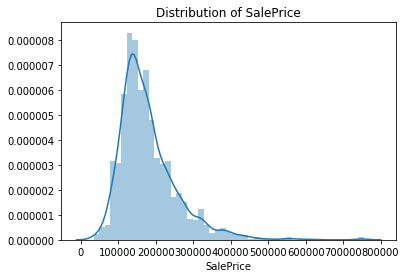

In [178]:
sns.distplot(train_df_p['SalePrice']).set_title("Distribution of SalePrice")

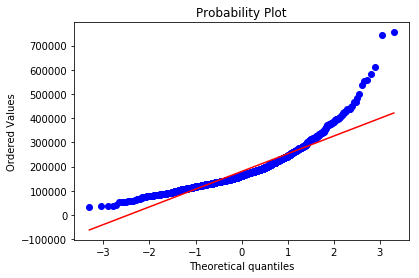

In [179]:
# probability plot
fig = plt.figure()
res = stats.probplot(train_df_p['SalePrice'], plot=plt)

From above plots, we can see that distribution of SalePrice is not Normal (there is a positive skewness) and also in probability plot, ordered values do not follow the linear trend. Let's transform the SalePrice attribute to have a normal distrubtion. We will see why it is important to get the dependent variables in the form of Normal distribution

In [180]:
#Using the log1p function applies log(1+x) to all elements of the column
train_df_p["SalePrice"] = np.log1p(train_df_p["SalePrice"])

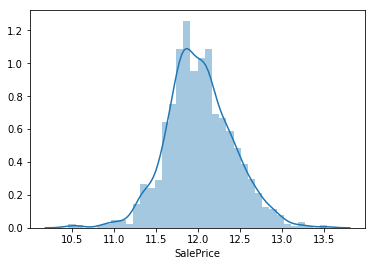

In [181]:
#Check the new distribution after log transformation 
sns.distplot(train_df_p['SalePrice'] )

In [182]:
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train_df_p['SalePrice'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))


 mean = 12.02 and std dev = 0.40



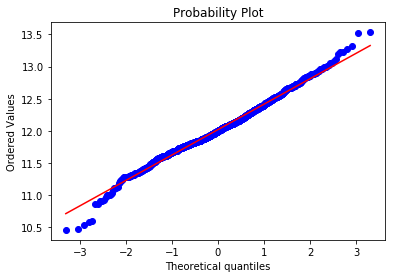

In [183]:
fig = plt.figure()
res = stats.probplot(train_df_p['SalePrice'], plot=plt)
plt.show()

Now we can see that distribution is Normal and Probability plot is following linear trend

Let's have a final check for null values

In [184]:
train_df_p.isnull().sum()

LotFrontage             0
LotArea                 0
Street                  0
Alley                   0
IsLevel                 0
AllUtilities            0
OverallQual             0
YearRemodAdd            0
MasVnrArea              0
BsmtFinSF1              0
BsmtUnfSF               0
TotalBsmtSF             0
CentralAir              0
GrLivArea               0
BsmtFullBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
Fireplaces              0
GarageCars              0
PavedDrive              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
ScreenPorch             0
age                     0
LotShape_Irr            0
LotShape_Reg            0
LotConfig_Corner        0
LotConfig_CulDSac       0
LotConfig_FR2           0
LotConfig_FR3           0
LotConfig_Inside        0
Neighborhood_Blmngtn    0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood

We do not have any Null values. Now the data is ready, lets split the data into train and validation set

In [185]:
X_train, X_val, y_train, y_val = train_test_split(train_df_p.drop('SalePrice', axis = 1), train_df_p['SalePrice'], test_size = 0.33, shuffle = True, random_state = 42)

In [186]:
X_train.shape

(972, 151)

In [187]:
X_val.shape

(479, 151)

In [188]:
y_train.shape

(972,)

In [189]:
y_val.shape

(479,)

# Let's fit a simple Linear Regression, RandomForestRegressor and GradientBoostRegressor models

In [190]:
LRM = LinearRegression()

In [191]:
LRM.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
LRM.score(X_val,y_val)

0.7714695935815974

In [193]:
predictions = LRM.predict(X_val)

In [194]:
print(mean_squared_error(y_val,predictions))

0.03816863837708663


In [195]:
RFM = RandomForestRegressor(max_depth = 10, n_estimators = 1500, random_state = 42)

In [196]:
RFM.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [197]:
RFM.score(X_val,y_val)

0.8132316370967162

In [198]:
predictions = RFM.predict(X_val)

In [199]:
print(mean_squared_error(y_val,predictions))

0.031193635086284446


In [200]:
GBR = GradientBoostingRegressor(max_depth = 3, n_estimators = 1500, verbose = 1, random_state = 42)

In [201]:
GBR.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.1335           20.42s
         2           0.1178           20.97s
         3           0.1050           20.58s
         4           0.0942           20.31s
         5           0.0849           20.33s
         6           0.0773           20.18s
         7           0.0709           20.08s
         8           0.0648           19.98s
         9           0.0598           19.91s
        10           0.0554           19.91s
        20           0.0315           19.75s
        30           0.0216           19.60s
        40           0.0164           19.46s
        50           0.0137           19.41s
        60           0.0120           19.45s
        70           0.0106           19.32s
        80           0.0096           19.23s
        90           0.0088           19.12s
       100           0.0082           19.01s
       200           0.0043           17.65s
       300           0.0027           16.38s
       40

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [202]:
GBR.score(X_val,y_val)

0.870711375613074

In [203]:
predictions_GBR = GBR.predict(X_val)

In [204]:
print(mean_squared_error(y_val,predictions_GBR))

0.021593497459855684


In [205]:
# Now Let's get predictions on test_df_p, before to that, let's check the shape of test_df and test_df_p 
# because we need Id from test_df tobe appended to predictions set

print(test_df.shape)
print(test_df_p.shape)

(1459, 152)
(1459, 151)


Number of rows are matching, let's go ahead and get the predictions using GBR model

In [206]:
predictions_test = GBR.predict(test_df_p)

In [207]:
test_df.head()

,Id,LotFrontage,LotArea,Street,Alley,IsLevel,AllUtilities,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,age,LotShape_Irr,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Fence_CP,Fence_NP,Fence_PP,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1461,80.0,11622,1,0,1,1.0,5,1961,0.0,468.0,270.0,882.0,1,896,0.0,1,0,2,1,0,1.0,1,140,0,0,120,49,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,1462,81.0,14267,1,0,1,1.0,6,1958,108.0,923.0,406.0,1329.0,1,1329,0.0,1,1,3,1,0,1.0,1,393,36,0,0,52,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1463,74.0,13830,1,0,1,1.0,5,1998,0.0,791.0,137.0,928.0,1,1629,0.0,2,1,3,1,1,2.0,1,212,34,0,0,13,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1464,78.0,9978,1,0,1,1.0,6,1998,20.0,602.0,324.0,926.0,1,1604,0.0,2,1,3,1,1,2.0,1,360,36,0,0,12,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
4,1465,43.0,5005,1,0,0,1.0,8,1992,0.0,263.0,1017.0,1280.0,1,1280,0.0,2,0,2,1,0,2.0,1,0,82,0,144,18,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [208]:
len(predictions_test)

1459

In [209]:
predictions_test.max()

13.32693617523529

In [210]:
predictions_test = np.expm1(predictions_test)

In [211]:
predictions_test.min()

52205.85079020459

In [212]:
predictions_test.max()

613499.3877948137

In [213]:
submission = test_df[['Id']].copy()

In [214]:
submission['SalePrice'] = predictions_test

In [215]:
submission.head()

,Id,SalePrice
0,1461,120713.297333
1,1462,154313.236141
2,1463,179121.820299
3,1464,186291.239243
4,1465,201811.968011


In [216]:
submission.to_csv('submission.csv', index=False, header=True)